This notebook if demonstation for challenge Vietnamese NLP Dataset for Continual Learning. In the past, underthesea team is only focused on tuning model. In this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges are [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environement

In [1]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer, computeIDF
from underthesea.utils.col_script import RawToUDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

Load dictionary with 31327 words.


### Datasets

In [2]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
dataset = RawToUDDataset(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
dataset.write(ud_file)

In [3]:
analyzer = UDAnalyzer()

In [4]:
analyzer.analyze_dataset_len(dataset)

Number of sentences 600


In [5]:
sent_ids = analyzer.analyze_sent_ids(dataset)

In [6]:
doc_sents = analyzer.analyze_doc_sent_freq(dataset)

Number of doc URLs 57


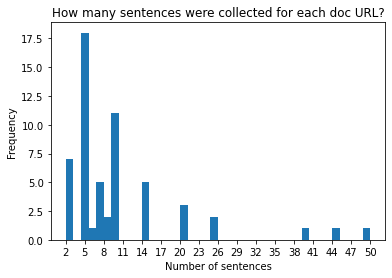

In [7]:
x = [item[1] for item in doc_sents]
plt.hist(x, bins=40)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title("How many sentences were collected for each doc URL?")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()

#### Stopwords using IDF

In [8]:
doc_word_freqs = analyzer.get_doc_word_freq(dataset).values()
idfs = computeIDF(doc_word_freqs)
print("Words with lowest IDFs are candidates for Stopwords!")
{k: v for k, v in sorted(dict(idfs).items(), key=lambda x: x[1])[:30]}

Words with lowest IDFs are candidates for Stopwords!


{',': 0.0,
 '.': 0.0,
 'và': 0.0931170239909173,
 'của': 0.12240640009290484,
 'là': 0.12240640009290484,
 'các': 0.13262556527459096,
 'được': 0.14309099895275587,
 'cho': 0.15381486434452904,
 'với': 0.16481024864599217,
 'trong': 0.16481024864599217,
 'từ': 0.17609125905568124,
 'người': 0.18767313160549642,
 'có': 0.18767313160549642,
 'đã': 0.1995723549052041,
 'đó': 0.23736091579460392,
 'theo': 0.23736091579460392,
 'này': 0.2507248773525854,
 'không': 0.2507248773525854,
 'nhiều': 0.2645131618382187,
 'để': 0.2645131618382187,
 'ở': 0.2787536009528289,
 'cũng': 0.2787536009528289,
 'vào': 0.2934768577735353,
 'đến': 0.2934768577735353,
 'một': 0.2934768577735353,
 '(': 0.2934768577735353,
 ')': 0.2934768577735353,
 'những': 0.30871682433027214,
 'khi': 0.30871682433027214,
 'năm': 0.3409015077016735}

### Actionable Insights

We want to explore:

* What is word frequencies?
* What is word frequencies today?
* How many words in this corpus?
* What are out of vocabulary words?

#### What are words

In [9]:
counter = analyzer.analyze_words(dataset)

Most common words
[(',', 838), ('.', 569), ('và', 189), ('của', 187), ('các', 173), ('người', 135), ('trong', 132), ('cho', 128), ('không', 123), ('với', 122), ('được', 122), ('là', 121), ('có', 110), ('để', 107), ('đến', 106), ('đã', 100), ('những', 95), ('một', 82), ('từ', 80), ('này', 75), ('khi', 74), ('ngày', 69), ('nhiều', 67), ('ở', 65), ('"', 63), ('vào', 62), ('theo', 61), ('cũng', 59), ('đó', 56), ('về', 55), ('phải', 54), ('năm', 52), ('như', 51), ('trên', 51), ('ông', 49), ('(', 49), (')', 49), ('anh', 49), ('điểm', 49), ('mình', 45), ('tôi', 44), ('thông tin', 43), ('sau', 43), ('ra', 42), ('tài khoản', 42), ('2', 41), ('sẽ', 41), ('số', 41), ('bị', 41), ('đang', 41)]
Corpus words:  2794
OOV words
{'bổ sung công', 'btv', 'long biên', 'trải nghiệm', 'tivi', 'an giang', 'sergio ramos', 'bối cảnh giới', 'phan cẩm vân', '2,5', 'astrazeneca', '–', 'uwe seeler', 'vẫy tay', 'h.t.', '17/8', '24/7', 'tnhh', '28,6', 'kon tum', 'nhà đầu tư', 'australia', 'meti', '29,75', "'", 'premie

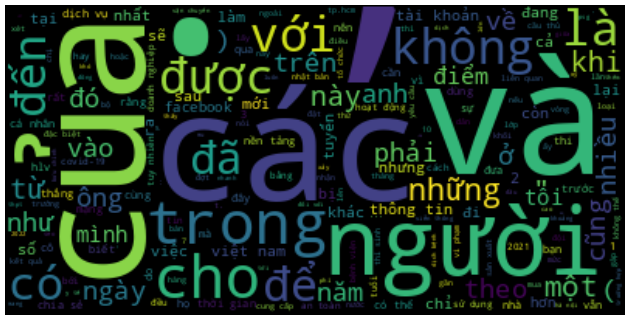

In [10]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

#### What are today words?

In [11]:
counter = analyzer.analyze_today_words(dataset)

Most common words
[(',', 221), ('.', 99), ('các', 86), ('của', 56), ('và', 51), ('người', 43), ('tài khoản', 41), ('thông tin', 40), ('để', 35), ('facebook', 32), ('đã', 32), ('cho', 32), ('số', 30), ('được', 29), ('trong', 29), ('đến', 26), ('trên', 26), ('nền tảng', 25), ('dịch vụ', 24), ('bị', 23), ('này', 22), ('có', 22), ('theo', 21), ('chia sẻ', 20), ('dùng', 20), ('với', 19), ('từ', 19), ('doanh nghiệp', 19), ('không', 18), ('những', 18), ('một', 18), ('là', 18), ('về', 18), ('”', 18), ('cá nhân', 18), ('an toàn', 17), ('“', 16), ('ngày', 16), ('khi', 15), ('sử dụng', 15), ('cung cấp', 14), ('viễn thông', 14), ('nhật bản', 14), ('lại', 13), ('mạng', 13), ('vận chuyển', 13), ('vào', 12), ('ra', 12), ('hoạt động', 12), ('biết', 12)]
Corpus words:  787
OOV words
{'hàng hóa trục', 'phong tỏa', 'công an thành phố', 'inbox', '80', '%', 'cho phép', '–', 'bộ tt&tt', '17/8', 'nhà cung cấp', 'đảng ldp', '24/7', ':', 'meti', 'tt&tt', 'cùng chung', 'facebook', 'page', 'châu á', '2030', '3-4

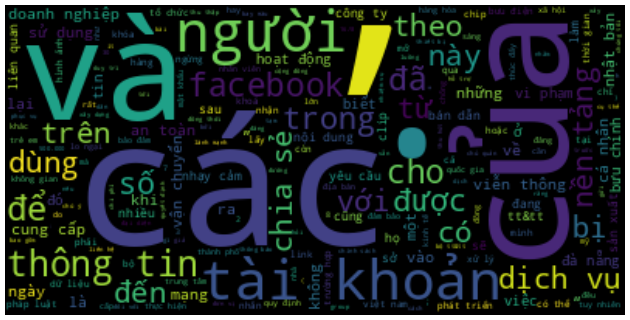

In [12]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

## How to Contribute?

It's great that you find this project interesting. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open datasets](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more actionable insights](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)